In [1]:
import os
import json
import matplotlib.pyplot as plt
%matplotlib notebook
import sys
sys.path.insert(0,"../")
import loader
import evaler

In [2]:
model_path = "../saved_models/cnn16-lr-3"
is_verbose = True
batch_size = 1
evl = evaler.Evaler(model_path, is_verbose,
                 batch_size=batch_size)
config_file = os.path.join(model_path, "config.json")
with open(config_file, 'r') as fid:
    config = json.load(fid)
data_conf = config['data']
ldr = loader.Loader(data_conf['path'],
                    batch_size,
                    seed=data_conf['seed'])

DEBUG:Network:First activation mat shape (1, ?, 1, 1)
DEBUG:Network:Next activation mat shape (1, ?, 1, 64)
DEBUG:Network:Next activation mat shape (1, ?, 1, 64)
DEBUG:Network:Next activation mat shape (1, ?, 1, 64)
DEBUG:Loader:Training set has 6823 samples
DEBUG:Loader:Validation set has 1705 samples
DEBUG:Loader:Data set {6823 samples}, batch size {1} -> 6823 batches
DEBUG:Loader:Data set {1705 samples}, batch size {1} -> 1705 batches


In [16]:
def get_prediction(idx):
    ecg = ldr.val[idx][0][0]
    pred = evl.predict([ecg])
    label = ldr.val[idx][1]
    return pred[0], label[0], ecg

<IPython.core.display.Javascript object>


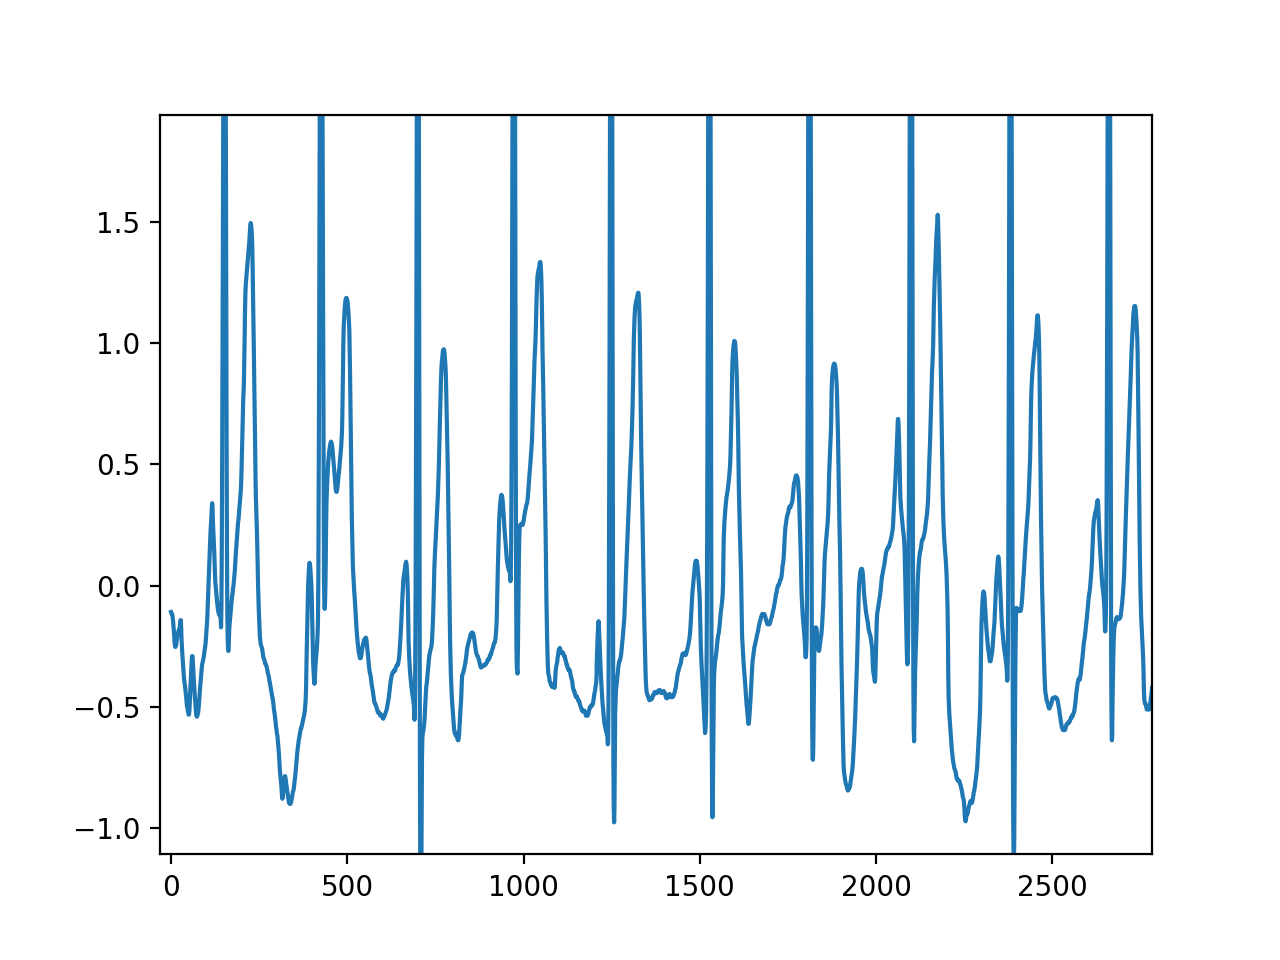

Ground Truth: O
Prediction: N


In [30]:
idx = 8
pred, label, ecg = get_prediction(idx)
plt.plot(ecg)
print("Ground Truth:", ldr.int_to_class(label))
print("Prediction:", ldr.int_to_class(pred))